In [34]:
import networkit as nk
import pandas as pd

In [35]:
import matplotlib.colors as mcolors

def interpolate_color(colors, value):
    rgba = [mcolors.to_rgba(color) for color in colors]
    delta = 1/(len(colors)-1)
    i_color= int(value/delta)
    i_value = (value%delta)/delta
    
    if i_color+ 1 >= len(colors):
        return rgba[-1]
    else:
        print(i_value)
        rgba1 = rgba[i_color]
        rgba2 = rgba[i_color+1]
        interpolated_rgba = tuple((c1 * (1 - i_value) + c2 * i_value) for c1, c2 in zip(rgba1, rgba2))
        return interpolated_rgba

In [36]:
G = nk.readGraph("../graphs/DoubleExperiment(n=10).graph", nk.Format.METIS)

#data = pd.read_csv("../results/pythonStd1.csv", sep=";")
data = pd.read_csv("../results/C++Std0.csv", sep=";")

min_degree = data['Centrality Degree'].min()
max_degree = data['Centrality Degree'].max()

# Min-max normalization using pandas
data['Centrality Degree'] = (data['Centrality Degree'] - min_degree) / (max_degree - min_degree)

data = data.to_dict(orient='records')
data = {row["Node"] : row["Centrality Degree"] for row in data}
data

{3: 0.0,
 0: 0.2000005999988001,
 2: 0.2000005999988001,
 1: 0.5,
 4: 0.5,
 6: 0.5,
 8: 0.5,
 9: 0.5,
 5: 1.0,
 7: 1.0}

0.2000005999988001
0.5
0.2000005999988001
0.0
0.5
0.5
0.5
0.5


C:\Users\rober\ambienti-virtuali-python\alghoritm-eng\Lib\site-packages\networkit\viztasks.py:85: UserWarning: networkit.viztasks.drawGraph is deprecated, will be removed in future updates. Use networkit.vizbridges instead to draw graphs (needs additional plugins).
  warn("networkit.viztasks.drawGraph is deprecated, will be removed in future updates. Use networkit.vizbridges instead to draw graphs (needs additional plugins).")


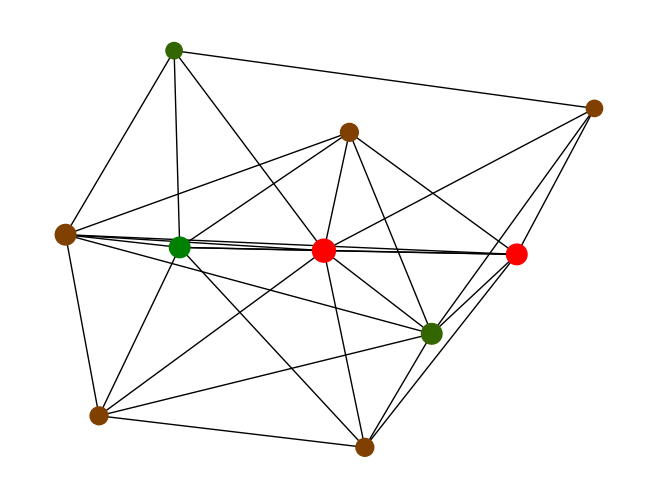

In [37]:
colors = ['green', 'red']

node_color = [interpolate_color(colors, data[node]) for node in range(G.numberOfNodes())]
nk.viztasks.drawGraph(G, node_color=node_color)